In [1]:
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")
f.cd("clustersAndCoincidences")
f.ls()

TFile**		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
 TFile*		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistog

In [3]:
clusters = f.Get("clustersAndCoincidences").Get("clusters")
print(clusters)

<ROOT.TH3I object ("clusters") at 0x7fffdbf9adc0>


In [4]:
e1 = 1700
e2 = 3100
calo = 3

wiggle = MakeWiggleFromTH3(clusters, e1, e2, calo)

In [5]:
DumpClass(wiggle)

Dumping:  <omega_a_fitting.MakeWiggleFromTH3 object at 0x7f6e2e41b940>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH3'>
    elow = 1700
    ehigh = 3100
    timeScaleFactor = 1
    caloNum = 3
    isPileupCorrected = False
    BinOrEnergy = energy
    title = Wiggle Plot for [1700 < E (MeV) < 3100] in Calo 3
    h = <ROOT.TH1D object ("wiggle_1700_3100_3") at 0x7fffdc0c38b0>


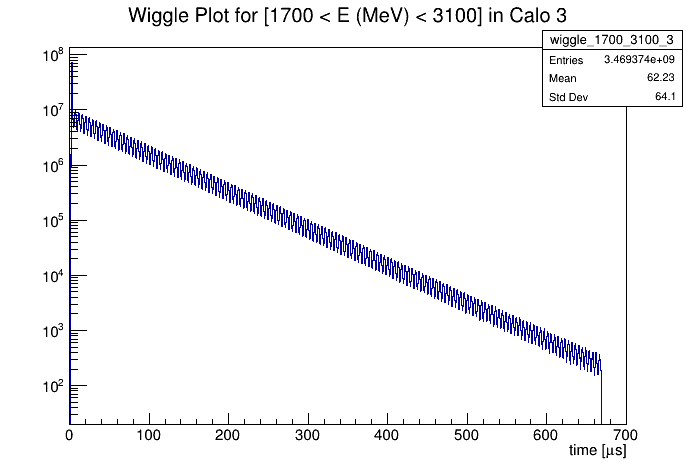

In [6]:
c = r.TCanvas()
wiggle.h.Draw()
c.SetLogy()
c.Draw()

---

### Now fit the wiggle plot

In [7]:
fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [8]:
DumpClass(fitFunc)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f6e2cb12c50>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f6e2cb12c18>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f6e2cb12c50>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f6e2cb12c50>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f6e2cb12c50>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f6e2cb12c50>>}
    kind = 5par


In [9]:
fitFunc([0],[2+x for x in range(18)])

-5.681362293202928

In [10]:
fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", 30, 650)
fit.SetParameters([10000,64.4,0.33,0,0])
fit.SetParNames()

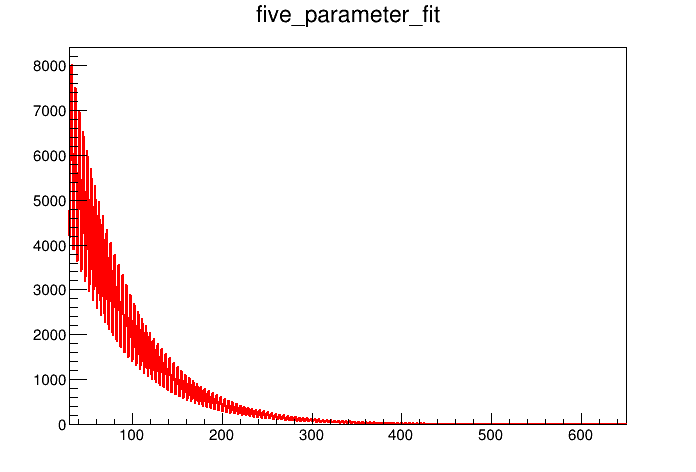

In [11]:
c = r.TCanvas()
fit.f.Draw()
c.Draw()

In [12]:
fitter = WiggleFitter(wiggle.h, fit, "5par", "REMB", 2)

In [13]:
fitter.Fit(2)

Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  13283.631706384704 / 4151 = 3.200104000574489
      N  =  7739919.408266482 +/- 301.5279559905583
      #tau_{#mu}  =  64.42315336787868 +/- 0.0014138590886957879
      A  =  0.37029153374699536 +/- 2.9195138201703652e-05
      R  =  -38.123715118828436 +/- 0.882499444846218
      #phi_{a}  =  -1.0608488612139664 +/- 0.00014488368199240236
Starting fit 2 / 2
Parameters from this fit: 
     ChiSq/NDF =  13283.631706375118 / 4151 = 3.2001040005721797
      N  =  7739919.404173828 +/- 301.5281600744909
      #tau_{#mu}  =  64.42315343784198 +/- 0.001413859958432096
      A  =  0.3702915348727992 +/- 2.9195139066344277e-05
      R  =  -38.12369456181341 +/- 0.8824972411739536
      #phi_{a}  =  -1.0608488635948026 +/- 0.0001448832302599344
 FCN=13283.6 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS        1223 TOTAL
                     EDM=4.51898e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                  

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [14]:
DumpClass(fitter)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f6e5c8ffb70>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("5par") at 0x7fffdc5a8360>
    f = <ROOT.TF1 object ("5par_fitter") at 0x7fffdc671100>
    name = 5par_fitter
    nPar = 5
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7739919.408266482, 64.42315336787868, 0.37029153374699536, -38.123715118828436, -1.0608488612139664], [7739919.404173828, 64.42315343784198, 0.3702915348727992, -38.12369456181341, -1.0608488635948026]]
    intermediateErrors = [[301.5279559905583, 0.0014138590886957879, 2.9195138201703652e-05, 0.882499444846218, 0.00014488368199240236], [301.5281600744909, 0.001413859958432096, 2.9195139066344277e-05, 0.8824972411739536, 0.0001448832302599344]]
    intermediateChi2 = [3.200104000574489, 3.2001040005721797]
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffdc6981c0>
    resid = <ROOT.TH1D object ("h_resid_5par_fitter") at 0x7fff

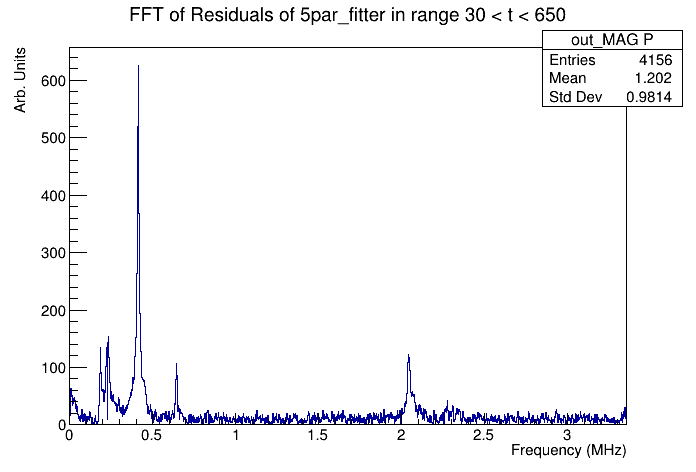

In [15]:
c = r.TCanvas()
fitter.fft.Draw("hist")
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


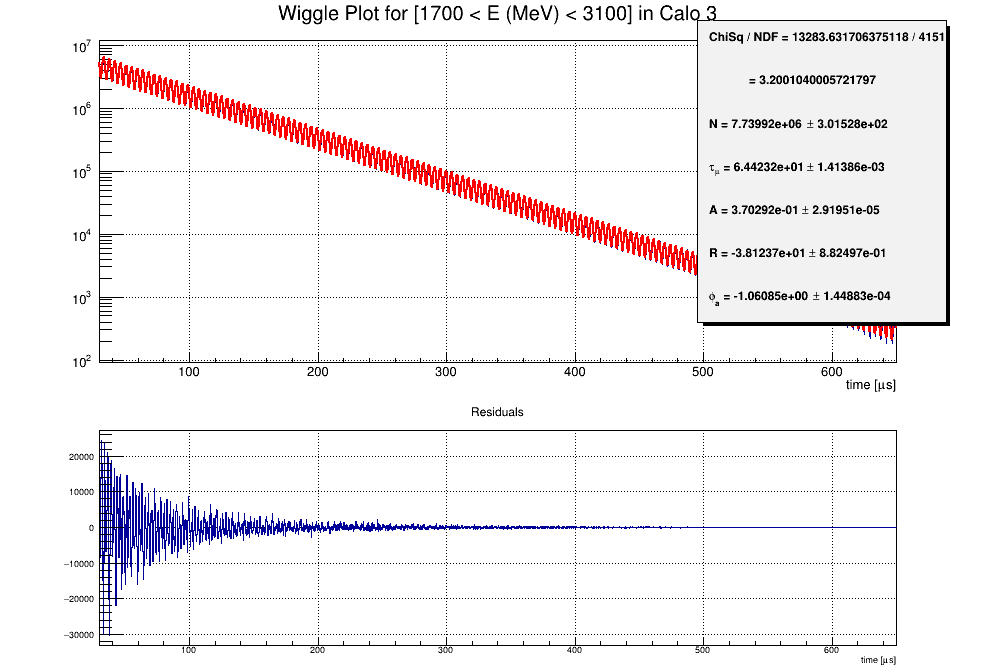

In [17]:
c = fitter.Draw()

---

### Now onto the 13-parameter fit, importing parameters as we go

In [16]:
fitFunc13 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "13par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [17]:
DumpClass(fitFunc13)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f63fffc8630>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f63fffc85f8>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f63fffc8630>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f63fffc8630>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f63fffc8630>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f63fffc8630>>}
    kind = 13par


In [18]:
fit13 = BuildTF1(fitFunc13, 13, "13par", "thirteen_parameter_fit", 30, 650)
fit13.SetParameters([100000.0, 64.32689658986958, -0.41149191856871803, -11.31981267111425, 
                     -4.201648334505292, -0.666502391530784, 0.6927259503578, -0.38908021438317, 
                     200.0, 2.5, 0.4745581246420292, 6.299934663288357, 0.28579778778899545])
fit13.ImportParameters(fitter.f)
fit13.SetParNames()

In [19]:
DumpClass(fit13)

Dumping:  <omega_a_fitting.BuildTF1 object at 0x7f63fffd83c8>
Class:  <class 'omega_a_fitting.BuildTF1'>
    f = <ROOT.TF1 object ("thirteen_parameter_fit") at 0x7ffffc2749f0>
    nPar = 13
    name = thirteen_parameter_fit
    fitLow = 30
    fitHigh = 650
    funcRaw = <omega_a_fitting.WiggleFit object at 0x7f63fffc8630>
    kind = 13par
    nameDict = {'5par': ['N', '#tau_{#mu}', 'A', 'R', '#phi_{a}'], '13par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}'], '17par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_{VW}'], '18par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_{VW}', 'K_{loss}']}
    initialParamet

In [20]:
fitter13 = WiggleFitter(wiggle.h, fit13, "13par", "REMB", 2)

In [21]:
DumpClass(fitter13)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f63fffd81d0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("13par") at 0x7ffffc29f590>
    f = <ROOT.TF1 object ("13par_fitter") at 0x7ffffc10da70>
    name = 13par_fitter
    nPar = 13
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7ffffc10df60>


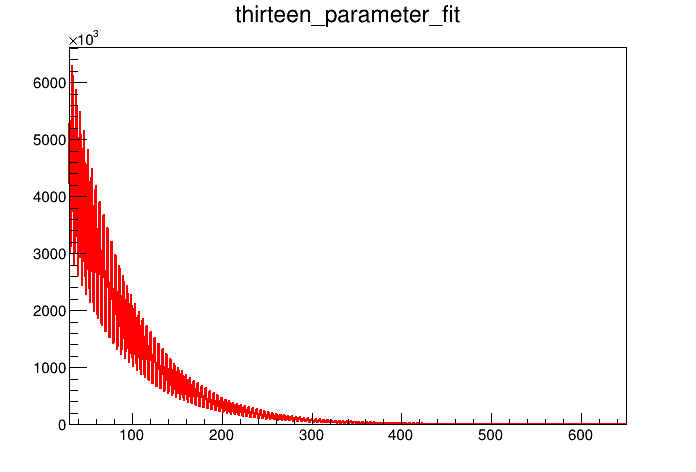

In [28]:
c = r.TCanvas()
fitter13.f.Draw()
c.Draw()

In [23]:
fitter13.Fit(2)

Starting fit 1 / 2
Parameters from this fit: 
      N  =  7740376.442522553 +/- 301.83760054018705
      #tau  =  64.42166137607214 +/- 0.0014145662699351336
      A  =  0.37033753275455333 +/- 2.9307807468514875e-05
      R  =  -36.62507161898046 +/- 0.8848438650953403
      #phi  =  -1.0611930942424772 +/- 0.00014562622470578454
      A_{1}  =  -0.004141624044629484 +/- 0.00010360911918641191
      A_{2}  =  0.001042880259689511 +/- 0.00018024630412609652
      A_{3}  =  -0.0012936843602575844 +/- 0.00018730713788178973
      #tau_{CBO}  =  167.96235225797986 +/- 9.361758750361126
      #omega_{CBO}  =  2.600005787904398 +/- 0.0003491436353101427
      #phi_{CBO - 1}  =  -0.6660997576447724 +/- 0.026283966345820472
      #phi_{CBO - 2}  =  13.634602020422468 +/- 0.1710311037020424
      #phi_{CBO - 3}  =  -3.5096078624953786 +/- 0.1436058281833797
Starting fit 2 / 2
Parameters from this fit: 
      N  =  7740376.42686978 +/- 301.83625722666477
      #tau  =  64.42166129787788 +/- 0.0

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


In [50]:
DumpClass(fitter13)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f63fffd81d0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("13par") at 0x7ffffc29f590>
    f = <ROOT.TF1 object ("13par_fitter") at 0x7ffffc10da70>
    name = 13par_fitter
    nPar = 13
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7740376.442522553, 64.42166137607214, 0.37033753275455333, -36.62507161898046, -1.0611930942424772, -0.004141624044629484, 0.001042880259689511, -0.0012936843602575844, 167.96235225797986, 2.600005787904398, -0.6660997576447724, 13.634602020422468, -3.5096078624953786], [7740376.42686978, 64.42166129787788, 0.3703375280627264, -36.62501262922156, -1.0611930827518306, -0.004141621100607783, 0.0010428744558216665, -0.0012936938816496574, 167.96224473773447, 2.600005788025253, -0.6660999340735261, 13.634603655538124, -3.509560688395822], [7745950.475336085, 64.37108313428219, 0.3698018185672182, -37.993352632561276, -1.061091786

<ROOT.TCanvas object ("c") at 0x7ffffc29d500>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


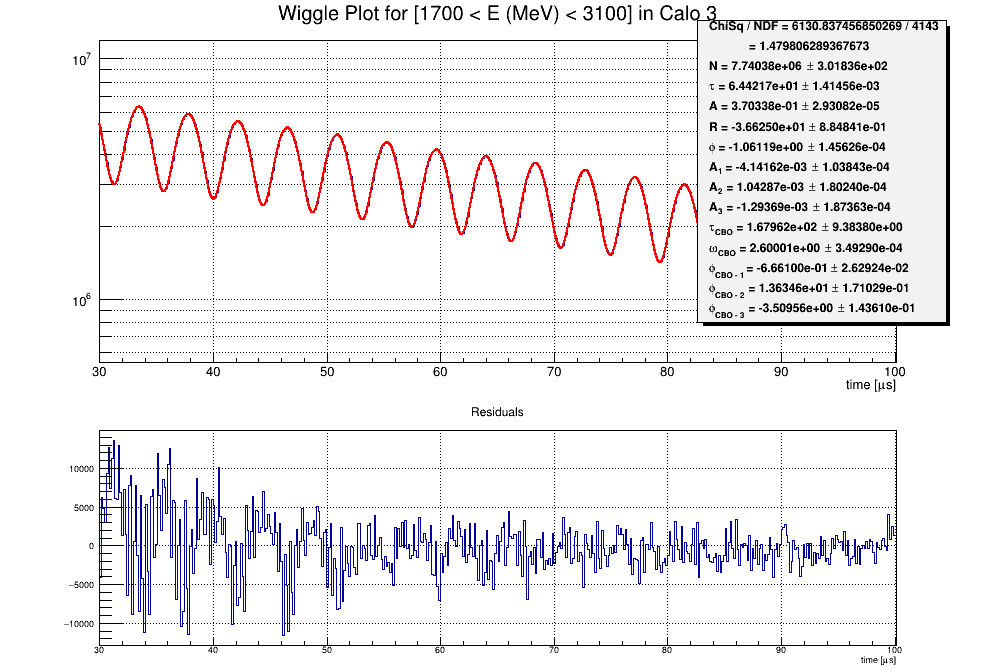

In [29]:
fitter13.Draw(30,100)

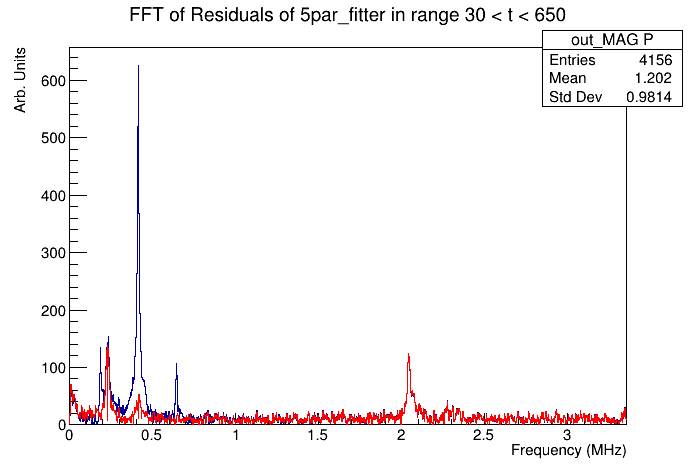

In [30]:
c = r.TCanvas()
fitter.fft.Draw("hist")
fitter13.fft.Draw("hist SAME")
fitter13.fft.SetLineColor(2)
c.Draw()

---

# 17-parameter fit

In [31]:
fitFunc17 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "17par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [33]:
DumpClass(fitFunc17)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f6405b205c0>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f63fffd80b8>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f6405b205c0>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f6405b205c0>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f6405b205c0>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f6405b205c0>>}
    kind = 17par


In [62]:
fit17 = BuildTF1(fitFunc17, 17, "17par", "seventeen_parameter_fit", 30, 650)
fit17.SetParameters([100000.0, 64.32689658986958, -0.41149191856871803, -11.31981267111425, -4.201648334505292, 
                     -0.666502391530784, 0.6927259503578, -0.38908021438317, 200.0, 2.5, 0.4745581246420292, 6.299934663288357, 
                     0.28579778778899545, 0.2, 30.0, 12.83, 0.0])
fit17.SetParLimits(14,1,10000)
fit17.ImportParameters(fitter13.f)
fit17.SetParNames()

In [63]:
DumpClass(fit17)

Dumping:  <omega_a_fitting.BuildTF1 object at 0x7f63ffff6b00>
Class:  <class 'omega_a_fitting.BuildTF1'>
    f = <ROOT.TF1 object ("seventeen_parameter_fit") at 0x7ffffc5ff0e0>
    nPar = 17
    name = seventeen_parameter_fit
    fitLow = 30
    fitHigh = 650
    funcRaw = <omega_a_fitting.WiggleFit object at 0x7f6405b205c0>
    kind = 17par
    nameDict = {'5par': ['N', '#tau_{#mu}', 'A', 'R', '#phi_{a}'], '13par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}'], '17par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_{VW}'], '18par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_{VW}', 'K_{loss}']}
    initialParam

In [64]:
fitter17 = WiggleFitter(wiggle.h, fit17, "17par", "REMB", 1)

In [65]:
fitter17.PrintParameters()

Parameters from this fit: 
      N  =  7745950.475428369 +/- 0.0
      #tau  =  64.37108311958931 +/- 0.0
      A  =  0.36980181038753435 +/- 0.0
      R  =  -37.99338981671824 +/- 0.0
      #phi  =  -1.0610917927627999 +/- 0.0
      A_{1}  =  -0.004143915435650966 +/- 0.0
      A_{2}  =  0.0008903935876051249 +/- 0.0
      A_{3}  =  -0.0012681487051628018 +/- 0.0
      #tau_{CBO}  =  167.5392742424262 +/- 0.0
      #omega_{CBO}  =  2.5941118548726543 +/- 0.0
      #phi_{CBO - 1}  =  -0.3494441685686851 +/- 0.0
      #phi_{CBO - 2}  =  13.772113811870511 +/- 0.0
      #phi_{CBO - 3}  =  -3.088831494457941 +/- 0.0
      A_{VW}  =  0.2 +/- 0.0
      #tau_{VW}  =  30.0 +/- 0.0
      #omega_{VW}  =  12.83 +/- 0.0
      #phi_{VW}  =  0.0 +/- 0.0


In [66]:
DumpClass(fitter17)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f63ff922b70>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("17par") at 0x7ffffc4e1db0>
    f = <ROOT.TF1 object ("17par_fitter") at 0x7ffffc4d9e20>
    name = 17par_fitter
    nPar = 17
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7ffffc4f83e0>


In [67]:
fitter17.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
      N  =  7740374.31715821 +/- 301.85387940849847
      #tau  =  64.42166948521992 +/- 0.001414606261472954
      A  =  0.37033756862150397 +/- 2.930807347932507e-05
      R  =  -36.6469205331114 +/- 0.8848791502603666
      #phi  =  -1.0611880245463219 +/- 0.00014563753477780134
      A_{1}  =  -0.0041465858666597235 +/- 0.00010376726829914807
      A_{2}  =  0.0010460794719963171 +/- 0.00018040420518011278
      A_{3}  =  -0.001284745287835519 +/- 0.00018738332430777966
      #tau_{CBO}  =  167.63500435153426 +/- 9.333964711740096
      #omega_{CBO}  =  2.5999966698624006 +/- 0.0003492575565701127
      #phi_{CBO - 1}  =  -0.6652788829138531 +/- 0.026280797313163427
      #phi_{CBO - 2}  =  13.636621625287338 +/- 0.17064366408132237
      #phi_{CBO - 3}  =  -3.511541336171619 +/- 0.14472155636472103
      A_{VW}  =  0.003999910674284208 +/- 0.0006797876812892265
      #tau_{VW}  =  31.09871521904391 +/- 3.684537176712686
      #omega_{V

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


In [68]:
DumpClass(fitter17)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f63ff922b70>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("17par") at 0x7ffffc4e1db0>
    f = <ROOT.TF1 object ("17par_fitter") at 0x7ffffc4d9e20>
    name = 17par_fitter
    nPar = 17
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7740374.31715821, 64.42166948521992, 0.37033756862150397, -36.6469205331114, -1.0611880245463219, -0.0041465858666597235, 0.0010460794719963171, -0.001284745287835519, 167.63500435153426, 2.5999966698624006, -0.6652788829138531, 13.636621625287338, -3.511541336171619, 0.003999910674284208, 31.09871521904391, 12.829962543705477, -7.572879363932006]]
    intermediateErrors = [[301.85387940849847, 0.001414606261472954, 2.930807347932507e-05, 0.8848791502603666, 0.00014563753477780134, 0.00010376726829914807, 0.00018040420518011278, 0.00018738332430777966, 9.333964711740096, 0.0003492575565701127, 0.026280797313163427, 0.17064366

<ROOT.TCanvas object ("c") at 0x7ffffc5ac0e0>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


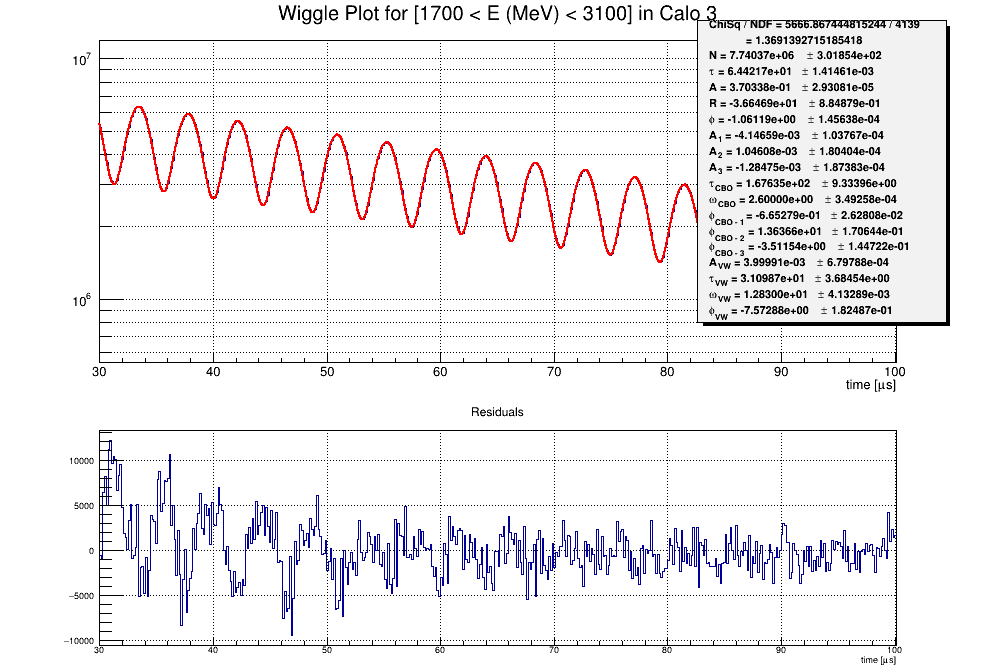

In [69]:
fitter17.Draw(30,100)

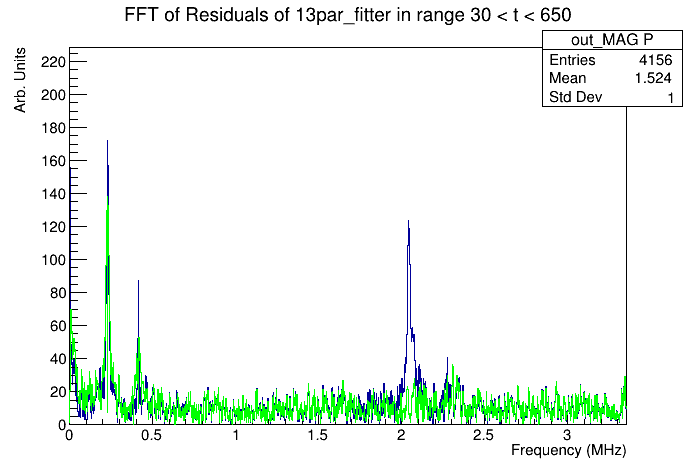

In [70]:
c = r.TCanvas()
#fitter.fft.Draw("hist")
fitter13.fft.Draw("hist ")
fitter17.fft.Draw("hist SAME")
fitter17.fft.SetLineColor(3)
c.Draw()

In [73]:
print([fitter17.f.GetParameter(i) for i in range(17)])

[7740374.31715821, 64.42166948521992, 0.37033756862150397, -36.6469205331114, -1.0611880245463219, -0.0041465858666597235, 0.0010460794719963171, -0.001284745287835519, 167.63500435153426, 2.5999966698624006, -0.6652788829138531, 13.636621625287338, -3.511541336171619, 0.003999910674284208, 31.09871521904391, 12.829962543705477, -7.572879363932006]


In [17]:
pars17 = [7740374.31715821, 64.42166948521992, 0.37033756862150397, -36.6469205331114, -1.0611880245463219, -0.0041465858666597235, 0.0010460794719963171, -0.001284745287835519, 167.63500435153426, 2.5999966698624006, -0.6652788829138531, 13.636621625287338, -3.511541336171619, 0.003999910674284208, 31.09871521904391, 12.829962543705477, -7.572879363932006, 0.0000001]

---

### And now 18-parameters, initializing the lost muon function first

In [7]:
triples = f.Get("clustersAndCoincidences").Get("triples")
triples_b = f.Get("clustersAndCoincidences").Get("backwardsTriples")
print(triples)

<ROOT.TH2I object ("triples") at 0x7fffca0a9250>


In [8]:
lifetimeFirstGuess = 64.42166948521992

In [9]:
lm = MuonLoss(triples, triples_b, lifetimeFirstGuess, 0, False, calo)

In [10]:
DumpClass(lm)

Dumping:  <lost_muon_calculation.MuonLoss object at 0x7faccb25ee10>
Class:  <class 'lost_muon_calculation.MuonLoss'>
    triples = <ROOT.TH1D object ("triples") at 0x7fffca10c520>
    backwardsTriples = <ROOT.TH1D object ("b_triples") at 0x7fffca116820>
    tau = 64.42166948521992
    subtractBackwards = False
    muonLossHist = <ROOT.TH1D object ("muonLossHist") at 0x7fffca2ce850>
    iteration = 0


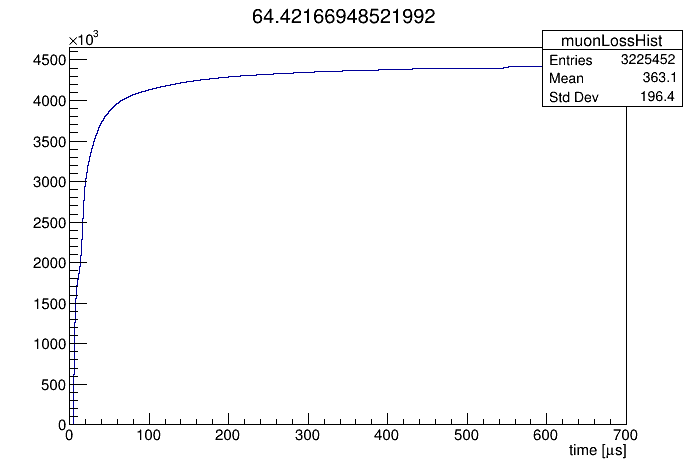

In [12]:
c = r.TCanvas()
lm.muonLossHist.Draw()
c.Draw()

In [15]:
fitFunc18 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "18par")
fitFunc18.initializeKloss( lm.muonLossHist )

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [16]:
DumpClass(fitFunc18)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7faccb1bf710>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7faccb1bf2e8>
    KlossHist = <ROOT.TH1D object ("KlossHist") at 0x7fffca2502f0>
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7faccb1bf710>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7faccb1bf710>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7faccb1bf710>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7faccb1bf710>>}
    kind = 18par


In [25]:
fit18 = BuildTF1(fitFunc18, 18, "18par", "eighteen_parameter_fit", 30, 650)
fit18.SetParameters(pars17)
fit18.SetParLimits(8,1,10000)
fit18.SetParLimits(14,1,10000)
#fit18.ImportParameters(fitter17.f)
fit18.SetParNames()

In [26]:
DumpClass(fit18)

Dumping:  <omega_a_fitting.BuildTF1 object at 0x7faccb0fd048>
Class:  <class 'omega_a_fitting.BuildTF1'>
    f = <ROOT.TF1 object ("eighteen_parameter_fit") at 0x7fffca50f0e0>
    nPar = 18
    name = eighteen_parameter_fit
    fitLow = 30
    fitHigh = 650
    funcRaw = <omega_a_fitting.WiggleFit object at 0x7faccb1bf710>
    kind = 18par
    nameDict = {'5par': ['N', '#tau_{#mu}', 'A', 'R', '#phi_{a}'], '13par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}'], '17par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_{VW}'], '18par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_{VW}', 'K_{loss}']}
    initialParamet

In [27]:
fitter18 = WiggleFitter(wiggle.h, fit18, "18par", "REMB", 1)

In [28]:
fitter18.PrintParameters()

Parameters from this fit: 
      N  =  7740374.31715821 +/- 0.0
      #tau  =  64.42166948521992 +/- 0.0
      A  =  0.37033756862150397 +/- 0.0
      R  =  -36.6469205331114 +/- 0.0
      #phi  =  -1.0611880245463219 +/- 0.0
      A_{1}  =  -0.0041465858666597235 +/- 0.0
      A_{2}  =  0.0010460794719963171 +/- 0.0
      A_{3}  =  -0.001284745287835519 +/- 0.0
      #tau_{CBO}  =  167.63500435153426 +/- 0.0
      #omega_{CBO}  =  2.5999966698624006 +/- 0.0
      #phi_{CBO - 1}  =  -0.6652788829138531 +/- 0.0
      #phi_{CBO - 2}  =  13.636621625287338 +/- 0.0
      #phi_{CBO - 3}  =  -3.511541336171619 +/- 0.0
      A_{VW}  =  0.003999910674284208 +/- 0.0
      #tau_{VW}  =  31.09871521904391 +/- 0.0
      #omega_{VW}  =  12.829962543705477 +/- 0.0
      #phi_{VW}  =  -7.572879363932006 +/- 0.0
      K_{loss}  =  1e-07 +/- 0.0


In [29]:
DumpClass(fitter18)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7faccb151be0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("18par") at 0x7fffc9f1ce00>
    f = <ROOT.TF1 object ("18par_fitter") at 0x7fffca55b150>
    name = 18par_fitter
    nPar = 18
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffca2ce140>
    resid = None


In [30]:
fitter18.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  12952808.977404956 / 4138 = 3130.209999372875
      N  =  9245766.621158943 +/- 1.000001235118713
      #tau  =  70.6004731996112 +/- 1.000001231357548
      A  =  0.3682960282111771 +/- 1.0000012309085848
      R  =  -47.85462348469611 +/- 1.0000012351185934
      #phi  =  -1.0691011700949915 +/- 1.0000012309130135
      A_{1}  =  641.0841194232343 +/- 1.0000012351186547
      A_{2}  =  1184.8817393316674 +/- 1.0000012351187095
      A_{3}  =  -2262.6933171197547 +/- 1.0000012351187093
      #tau_{CBO}  =  3.729206819407619 +/- 6217.498499727585
      #omega_{CBO}  =  1.1172419477432725 +/- 1.0000012309081183
      #phi_{CBO - 1}  =  51.612427347089486 +/- 1.0000012326181722
      #phi_{CBO - 2}  =  30936.38217179356 +/- 1.0000012319018199
      #phi_{CBO - 3}  =  -47067.77770949617 +/- 1.0000012313927478
      A_{VW}  =  0.014958429788145646 +/- 1.0000012310110682
      #tau_{VW}  =  37.22632386898262 +/- 5887.5433227650

Warning in <Fit>: Abnormal termination of minimization.
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [ ]:
DumpClass(fitter18)

In [ ]:
fitter18.Draw(30,100)

In [81]:
SaveToRootFile(fitter18, "Hello")

Saving class <omega_a_fitting.WiggleFitter object at 0x7faccb151be0>  to file  Hello_2019_07_16_12_04_23.root
